In [1]:
# Loading the required libraries
import pandas as pd
import geopandas as gpd
import os
import descartes
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Setting up the working directory
os.chdir("/Users/anshsandhu/Desktop/Columbia University/Qsel/ansh_working")
print(os.getcwd())

/Users/anshsandhu/Desktop/Columbia University/Qsel/ansh_working


In [3]:
# Reading and visualizing the data
data = pd.read_csv("/Users/anshsandhu/Desktop/Columbia University/Qsel/ansh_working/kplc_oldnewdg_singlecustbldgs_fullstableconsumption_101616_reduced.csv")
print(data.head(1))
# Importing and visulaizing the shape file
shape_file = gpd.read_file("final_results_jan29.shp")
display(shape_file)

   Unnamed: 0  ('NIS_RAD', 'mean') ('installation', 'installation')  \
0           0            3415394.0              2011-06-16 00:00:00   

   nreca_lat_x  nreca_lon_x  mean_stable_cons(kWh)_after12  \
0    -4.662351    39.218394                      49.488372   

   std_stable_cons(kWh)_after12  entries_stable_cons_after12  \
0                     10.688773                         43.0   

   mean_stable_cons(kWh)_after18  std_stable_cons(kWh)_after18  \
0                      48.864865                      9.583663   

   entries_stable_cons_after18  
0                         37.0  


,structdens,hh2017,costperstr,county,scount,hhdens2017,ward,pop2017,structpert,popdens201,sth,mvperstruc,lvperstruc,struct_den,geometry
0,22.503936,4211.960133,1624.309454,Lamu,3667.0,25.848290,Bahari,18038.303458,18.709184,110.698888,0.870616,32.782370,69.785083,22.50,"POLYGON ((40.82471 -2.38531, 40.76752 -2.45148..."
1,175.948013,6036.857225,628.752771,Machakos,9387.0,113.153620,KangundoWest,26581.494721,59.789809,498.238114,1.554948,8.405230,38.517149,175.95,"POLYGON ((37.31378 -1.31677, 37.37534 -1.40745..."
2,432.411478,14801.350549,346.988992,Nairobi,10853.0,589.723935,Roysambu,47259.664517,137.379747,1882.946779,0.733244,3.275154,25.055196,432.41,"POLYGON ((36.89032 -1.20100, 36.88966 -1.21733..."
3,153.109147,7213.707170,710.324437,Bungoma,11424.0,96.681071,Tongaren,39483.647461,51.000000,529.176084,1.583652,9.653540,42.977024,153.11,"POLYGON ((34.97355 0.84574, 35.01438 0.79914, ..."
4,0.041121,8301.306859,21015.136817,Garissa,218.0,1.565869,Bura,41014.083889,19.818182,7.736453,0.026261,820.722074,39.616753,0.04,"POLYGON ((40.51383 -0.88521, 40.58008 -0.90039..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,165.347099,7606.481213,675.694135,Bungoma,11174.0,112.556793,NaitiriKabuyefwe,42351.956581,55.316832,626.702448,1.469010,8.920897,41.651634,165.35,"POLYGON ((34.91668 0.84494, 34.91435 0.78791, ..."
1421,39.401873,2199.368564,1221.698312,Baringo,3609.0,24.011981,Sacho,15832.195340,26.536765,172.850693,1.640926,24.346267,53.767450,39.40,"POLYGON ((35.79714 0.41425, 35.79767 0.33951, ..."
1422,40.025867,5561.047139,874.382429,Kilifi,4117.0,54.065031,Junju,31112.626292,35.800000,302.479919,0.740328,18.413786,35.817186,40.03,"POLYGON ((39.80750 -3.78101, 39.84271 -3.77319..."
1423,222.686241,5150.818557,482.910512,Nyeri,6716.0,170.788627,Karima,17688.808120,74.622222,586.517895,1.303870,6.573215,29.177846,222.69,"POLYGON ((36.98238 -0.50220, 37.00189 -0.51749..."


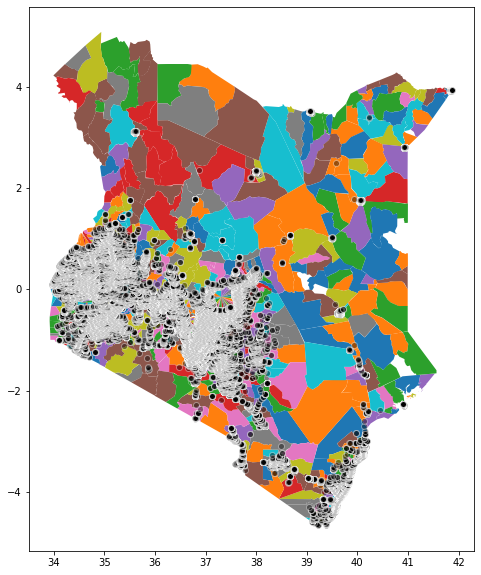

In [4]:
# Visualizing the 

lgnd_kwds = {'title': 'Wards',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 4}
shape_file.plot(column = "ward", legend = False, figsize = (10,10))
plt.scatter(  data.nreca_lon_x, data.nreca_lat_x, c = "black", edgecolor = "white" , alpha = 0.4)
plt.show()

In [5]:
# Converting the DataFrame to a GeoDataFrame

from shapely.geometry import Point

data['geometry'] = data.apply(lambda x: Point(float(x.nreca_lon_x), float(x.nreca_lat_x)), axis=1)
data_geo = gpd.GeoDataFrame(data, crs = shape_file.crs, geometry = data.geometry)

print(type(data_geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [6]:
# Spatially joining the DataFrame and ShapeFile

data_shape_file = gpd.sjoin(data_geo, shape_file, op = "within")


/Users/anshsandhu/opt/anaconda3/envs/data-analysis-qsel/lib/python3.8/site-packages/numpy/lib/function_base.py:2192: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [7]:
print("Type of the combined file:", type(data_shape_file))
data_shape_file.head(5)

Type of the combined file: <class 'geopandas.geodataframe.GeoDataFrame'>


,Unnamed: 0,"('NIS_RAD', 'mean')","('installation', 'installation')",nreca_lat_x,nreca_lon_x,mean_stable_cons(kWh)_after12,std_stable_cons(kWh)_after12,entries_stable_cons_after12,mean_stable_cons(kWh)_after18,std_stable_cons(kWh)_after18,...,scount,hhdens2017,ward,pop2017,structpert,popdens201,sth,mvperstruc,lvperstruc,struct_den
34,34,4403729.0,2014-06-13 00:00:00,-4.630955,39.203768,17.142857,21.195879,7.0,0.000000,0.000000,...,7756.0,25.345379,Vanga,37160.618787,20.737968,138.129621,1.137478,30.872558,55.214268,28.83
35,35,5006145.0,2015-04-04 00:00:00,-4.618810,39.136656,NaN,NaN,NaN,NaN,NaN,...,7756.0,25.345379,Vanga,37160.618787,20.737968,138.129621,1.137478,30.872558,55.214268,28.83
40,40,4609686.0,2014-09-02 00:00:00,-4.597308,39.106737,226.500000,60.334484,4.0,NaN,NaN,...,7756.0,25.345379,Vanga,37160.618787,20.737968,138.129621,1.137478,30.872558,55.214268,28.83
44,44,4446391.0,2014-06-03 00:00:00,-4.559578,39.130741,32.000000,38.168798,7.0,0.000000,0.000000,...,7756.0,25.345379,Vanga,37160.618787,20.737968,138.129621,1.137478,30.872558,55.214268,28.83
45,45,2339711.0,2004-12-17 00:00:00,-4.554168,39.123945,213.236111,60.825911,72.0,213.236111,60.825911,...,7756.0,25.345379,Vanga,37160.618787,20.737968,138.129621,1.137478,30.872558,55.214268,28.83


<AxesSubplot:>

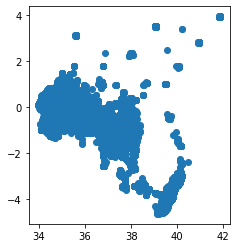

In [8]:
data_shape_file.plot()

In [9]:
# Trying out group-by

selected_data = data_shape_file.loc[:,["mean_stable_cons(kWh)_after12","ward","mvperstruc"]]
grouped_data_set = selected_data.groupby(by = "ward")

In [10]:
selected_data.count()

mean_stable_cons(kWh)_after12    81753
ward                             94982
mvperstruc                       94982
dtype: int64

### Visulaizing and understanding the data

In [11]:
# number of wards:
unique_wards = set(data_shape_file.loc[:,"ward"])
print("The number of wards is:", len(unique_wards))

The number of wards is: 1215


In [12]:
# Counting the data sets in each ward 

count_per_ward = selected_data.groupby('ward').count()

In [13]:
# Number of data sets per ward
count = data_shape_file.groupby(by = 'ward').count()
max_count_ward = count.loc[:,"nreca_lat_x"]

# Exploring the number of readings per ward
print(" Total number of wards:", len(max_count_ward))
print(" Number of wards with less than 5 readings:" , len(max_count_ward[max_count_ward < 5]) )
print(" Number of wards with less than 10 readings:" , len(max_count_ward[max_count_ward < 10]))
print(" Number of wards with less than 20 readings:" , len(max_count_ward[max_count_ward < 20]) )
print(" Number of wards with more than 200 readings:" , len(max_count_ward[max_count_ward > 200]) )


 Total number of wards: 1215
 Number of wards with less than 5 readings: 106
 Number of wards with less than 10 readings: 209
 Number of wards with less than 20 readings: 384
 Number of wards with more than 200 readings: 117


Text(0.5, 1.0, 'Visulaizing the distribution of Readings')

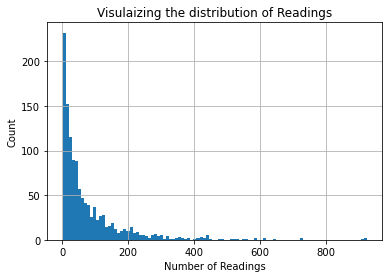

In [14]:
# Plotting histogram to visulize data points in each ward

plt.hist(x= max_count_ward, bins= 100 )
plt.grid()
plt.xlabel('Number of Readings')
plt.ylabel('Count')
plt.title('Visulaizing the distribution of Readings')

In [15]:
# Summary Statistics of Each Ward

selected_data = data_shape_file.loc[:,["mean_stable_cons(kWh)_after12", "ward", "sth", "mvperstruc","lvperstruc"]].groupby(by = 'ward').mean()

# converting geopandas back into pandas for easy plotting

pd_selected_data = pd.DataFrame(selected_data)

# Converting ward from an index to a column

pd_selected_data.reset_index(level=0, inplace=True)

count_ward = max_count_ward.reset_index(level=0, inplace= False)

pd_selected_data['count'] = count_ward["nreca_lat_x"]
pd_selected_data.columns

Index(['ward', 'mean_stable_cons(kWh)_after12', 'sth', 'mvperstruc',
       'lvperstruc', 'count'],
      dtype='object')

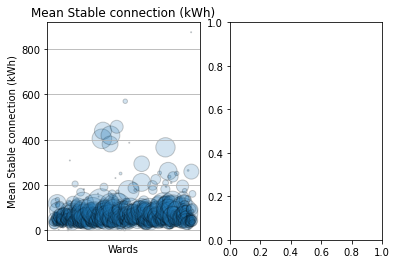

In [16]:
# Visualizing the mean
fig, ax = plt.subplots(1,2)

ax[0].scatter( x = pd_selected_data.loc[:, "ward"], y =  pd_selected_data.loc[:, "mean_stable_cons(kWh)_after12"],
           alpha = 0.2, s = pd_selected_data["count"], edgecolors= 'black')
ax[0].get_xaxis().set_ticks([])
ax[0].grid(axis = 'y')
ax[0].set_xlabel("Wards")
ax[0].set_ylabel("Mean Stable connection (kWh)")
ax[0].set_title("Mean Stable connection (kWh)")
plt.show()





ax[1].scatter( x = pd_selected_data.loc[:, "ward"], y =  pd_selected_data.loc[:, "mean_stable_cons(kWh)_after12"],
           alpha = 0.2, s = pd_selected_data["count"], edgecolors= 'black')
ax[1].get_xaxis().set_ticks([])
ax[1].grid(axis = 'y')
ax[1].set_xlabel("Wards")
ax[1].set_ylabel("Mean Stable connection (kWh)")


plt.show()


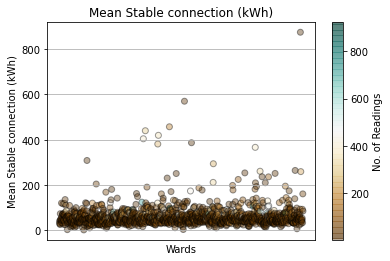

In [17]:
# Visualizing the mean

fig, ax = plt.subplots()

plt.scatter( x = pd_selected_data.loc[:, "ward"], y =  pd_selected_data.loc[:, "mean_stable_cons(kWh)_after12"],
           alpha = 0.4, c = pd_selected_data["count"], edgecolors= 'black', cmap = 'BrBG')
ax.get_xaxis().set_ticks([])
ax.grid(axis = 'y')
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
ax.set_xlabel("Wards")
ax.set_ylabel("Mean Stable connection (kWh)")
ax.set_title("Mean Stable connection (kWh)")

plt.show()




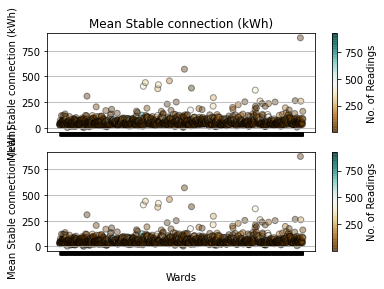

<Figure size 1440x720 with 0 Axes>

In [18]:
plt.subplot(2,1,1)
plt.scatter( x = pd_selected_data.loc[:, "ward"], y =  pd_selected_data.loc[:, "mean_stable_cons(kWh)_after12"],
           alpha = 0.4, c = pd_selected_data["count"], edgecolors= 'black', cmap = 'BrBG')
plt.xticks(color='w')
plt.grid(axis = 'y')
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Wards")
plt.ylabel("Mean Stable connection (kWh)")
plt.title("Mean Stable connection (kWh)")


plt.subplot(2, 1, 2)
plt.scatter( x = pd_selected_data.loc[:, "ward"], y =  pd_selected_data.loc[:, "mean_stable_cons(kWh)_after12"],
           alpha = 0.4, c = pd_selected_data["count"], edgecolors= 'black', cmap = 'BrBG')
plt.xticks(color='w')
plt.grid(axis = 'y')
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Wards")
plt.ylabel("Mean Stable connection (kWh)")

plt.figure(figsize=(20,10))

plt.show()



In [19]:
# Analysing the outliers:

mean_outliers = selected_data[selected_data["mean_stable_cons(kWh)_after12"] > 200]
print("Wards with mean greater than 200 are:", mean_outliers)

Wards with mean greater than 200 are:                            ward  mean_stable_cons(kWh)_after12       sth  \
137                  Chepchabas                     308.020000       NaN   
183              EastleighNorth                     203.958444  0.108925   
418                       Karen                     403.981935  1.076099   
428                      Karura                     439.472731  0.720378   
490                  Kileleshwa                     380.744168  0.530635   
493                    Kilimani                     419.131190  0.535830   
537                    Kisanana                     230.333333  1.463074   
548                    Kitisuru                     456.966253  0.464733   
582                   KwaReuben                     250.342437  0.465116   
623               LowerSavannah                     569.874272  0.443421   
658                      Makina                     386.421053  0.096493   
766           MjiWaKaleMakadara                   

### Comments:

Number of Readings seem okay, Enough readings for many of the outliers

Witu has an unusually high mean, and only one reading

Witu can be eliminated from the analysis


Text(0.5, 1.0, 'Distribution of mean stable connection after 12 months')

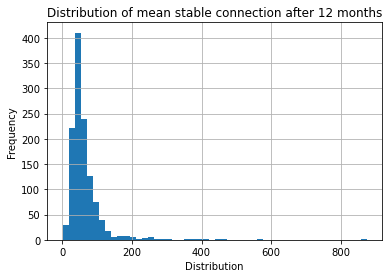

In [20]:
# Analysing the distribution of the mean:

mean_wards_series = selected_data["mean_stable_cons(kWh)_after12"]

# Histogram

fig, ax = plt.subplots()
ax.hist(mean_wards_series, bins = 50)
plt.grid()
plt.xlabel("Distribution")
plt.ylabel("Frequency")
plt.title("Distribution of mean stable connection after 12 months")


In [21]:
# The stats for the mean distribution:

<ipython-input-22-9624602eb5ca>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pd_selected_data["ward"], rotation = 90)


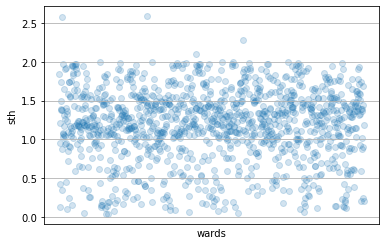

In [22]:
# Visulasing the distribution of sth among wards

fig, ax = plt.subplots()
ax.scatter(pd_selected_data["ward"], pd_selected_data["sth"],alpha = 0.2)
ax.set_xticklabels(pd_selected_data["ward"], rotation = 90)
ax.get_xaxis().set_ticks([])
plt.grid(axis = 'y')
plt.xlabel("wards")
plt.ylabel("sth")
plt.show()

Text(0.5, 1.0, 'Distribution of structures per Household')

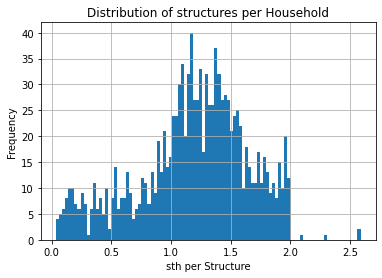

In [23]:
# Analysing the distribution of the sth per structure:

sth_wards_series = selected_data["sth"]

# Histogram

fig, ax = plt.subplots()
ax.hist(sth_wards_series, bins = 100)
plt.grid()
plt.xlabel("sth per Structure")
plt.ylabel("Frequency")
plt.title("Distribution of structures per Household")




In [24]:
# Wards with sth above 2

selected_data[selected_data["sth"] > 2]

,ward,mean_stable_cons(kWh)_after12,sth,mvperstruc,lvperstruc,count
12,Akirangondu,60.261305,2.579275,12.235279,50.085620,31
350,Kalama,39.006152,2.588789,156.152364,78.226225,4
544,Kitengela,107.172470,2.099029,29.547908,65.287097,63
734,Mbeu,41.749020,2.287894,13.957526,58.168370,9


Text(0.5, 1.0, 'Distribution of MV per Structure')

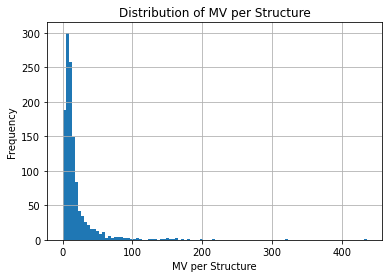

In [25]:
# Analysing the distribution of the MV per structure:

mv_wards_series = selected_data["mvperstruc"]

# Histogram

fig, ax = plt.subplots()
ax.hist(mv_wards_series, bins = 100)
plt.grid()
plt.xlabel("MV per Structure")
plt.ylabel("Frequency")
plt.title("Distribution of MV per Structure")



In [26]:
# mv per structure more than 300:

selected_data[selected_data["mvperstruc"] > 300]
selected_data[selected_data["lvperstruc"] > 115]



,ward,mean_stable_cons(kWh)_after12,sth,mvperstruc,lvperstruc,count
517,KipiniWest,141.452381,0.067007,435.709358,127.811203,1


Text(0.5, 1.0, 'Distribution of LV per Structure')

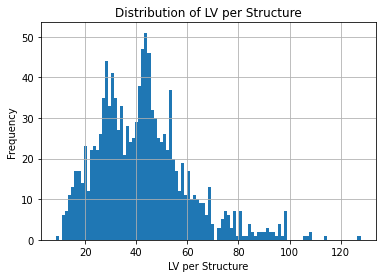

In [27]:
# Analysing the distribution of the MV per structure:
lv_wards_series = selected_data["lvperstruc"]

# Histogram

fig, ax = plt.subplots()
ax.hist(lv_wards_series, bins = 100)
plt.grid()
plt.xlabel("LV per Structure")
plt.ylabel("Frequency")
plt.title("Distribution of LV per Structure")




In [28]:
# Analysing the outliers:

sth_outliers = selected_data[selected_data["sth"] > 2]
print("Wards with sth greater than 2 are:", sth_outliers)

Wards with sth greater than 2 are:             ward  mean_stable_cons(kWh)_after12       sth  mvperstruc  \
12   Akirangondu                      60.261305  2.579275   12.235279   
350       Kalama                      39.006152  2.588789  156.152364   
544    Kitengela                     107.172470  2.099029   29.547908   
734         Mbeu                      41.749020  2.287894   13.957526   

     lvperstruc  count  
12    50.085620     31  
350   78.226225      4  
544   65.287097     63  
734   58.168370      9  


### Comments:

The "outliers" have enough readings 

In [29]:
# analysing the LV connections:

mv_wards_series = selected_data["mvperstruc"]



(array([188., 300., 258., 149.,  84.,  42.,  34.,  26.,  22.,  15.,  16.,
         13.,   8.,  11.,   2.,   5.,   2.,   4.,   4.,   4.,   3.,   2.,
          1.,   1.,   2.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,
          1.,   2.,   1.,   1.,   3.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.        ,   4.35709358,   8.71418717,  13.07128075,
         17.42837433,  21.78546792,  26.1425615 ,  30.49965508,
         34.85674867,  39.21384225,  43.57093583,  47.92802942,
         52.285123  ,  56.64221658,  60.99931017,  65.35640375,
         69.71349733,  74.07059092,  78.4276845 ,  82.78477808

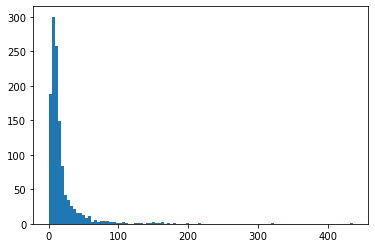

In [30]:

fig, ax = plt.subplots()
ax.hist(mv_wards_series, bins = 100)

## Visualizing Correlations

### Removing Outlier (Witu) before plotting

In [31]:
# Cleaning the data

cleaned_data = selected_data[selected_data["ward"] != ("Witu", "KipiniWest","GarsenWest")   ]

## Correlations between Electricity consumption and MV per structure:

<Figure size 1440x720 with 0 Axes>

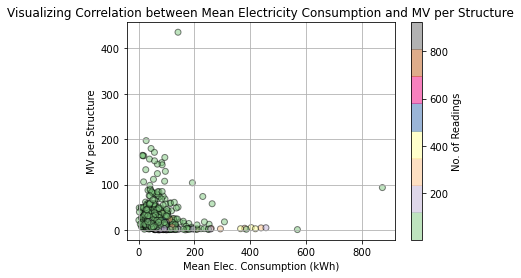

<Figure size 1440x720 with 0 Axes>

In [32]:
# Plotting to see what the relationship looks like:

plt.scatter( "mean_stable_cons(kWh)_after12", "mvperstruc", data = cleaned_data, c= "count",
           cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')
plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("MV per Structure")

plt.title("Visualizing Correlation between Mean Electricity Consumption and MV per Structure")

plt.figure(figsize=(20,10))



<Figure size 1440x720 with 0 Axes>

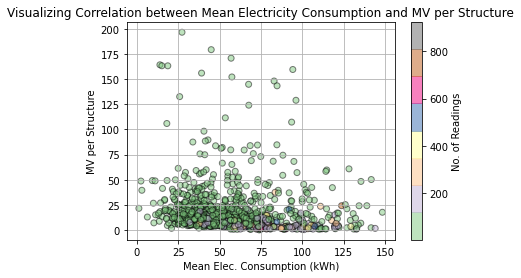

<Figure size 1440x720 with 0 Axes>

In [33]:
# Magnifying the plot from mean of 0-150 and MV per Strc 0 - 200:

plt.scatter( "mean_stable_cons(kWh)_after12", "mvperstruc",
            data = cleaned_data[ (cleaned_data["mean_stable_cons(kWh)_after12"] < 150) & (cleaned_data["mvperstruc"] < 200) ],
            c= "count",cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')
plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("MV per Structure")

plt.title("Visualizing Correlation between Mean Electricity Consumption and MV per Structure")

plt.figure(figsize=(20,10))




<Figure size 1440x720 with 0 Axes>

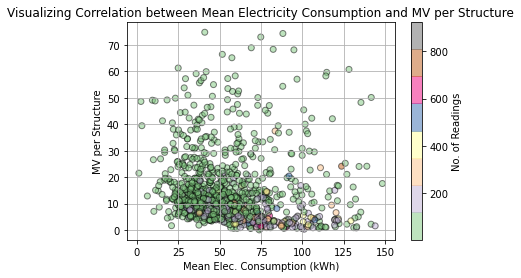

<Figure size 1440x720 with 0 Axes>

In [34]:
# Magnifying the plot from mean of 0-150 and MV per Strc 0 - 200:

plt.scatter( "mean_stable_cons(kWh)_after12", "mvperstruc",
            data = cleaned_data[ (cleaned_data["mean_stable_cons(kWh)_after12"] < 150) & (cleaned_data["mvperstruc"] < 75) ],
            c= "count",cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')
plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("MV per Structure")

plt.title("Visualizing Correlation between Mean Electricity Consumption and MV per Structure")

plt.figure(figsize=(20,10))

#### Correlation doesn't seem significant by looking at the plots

In [35]:
# Quantifying the correlations:

Corr_ec_mv = cleaned_data["mean_stable_cons(kWh)_after12"].corr( cleaned_data["mvperstruc"]  )
print("Correlation between Electricity consumption and MV is",Corr_ec_mv )



Correlation between Electricity consumption and MV is -0.0040882570037435485


#### Correlation between Electricity consumption and MV is -0.04796763561166269; Some correlation might exist between the dense plots

Corr in this case: -0.15637587373390255


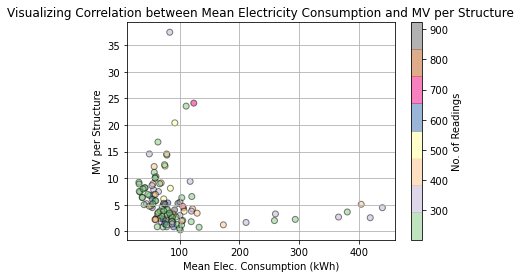

<Figure size 1440x720 with 0 Axes>

In [36]:
#Just Plotting the data with readings > 100:

plt.scatter( "mean_stable_cons(kWh)_after12", "mvperstruc",
            data = cleaned_data[ cleaned_data["count"] > 200],
            c= "count",cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')
plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("MV per Structure")

plt.title("Visualizing Correlation between Mean Electricity Consumption and MV per Structure")

plt.figure(figsize=(20,10))

# Quantifying this correlation:
HighReadingsData = cleaned_data[cleaned_data["count"] > 200]
print("Corr in this case:", HighReadingsData["mean_stable_cons(kWh)_after12"].corr( HighReadingsData["mvperstruc"]))

In [37]:
# Tests for Sanity check; don't expect any results:

data_na_removed = cleaned_data.dropna()

x1a = data_na_removed["mean_stable_cons(kWh)_after12"]
x2a = data_na_removed["mvperstruc"]

# Kendall's tau test


tau, p_value = stats.kendalltau(x1a, x2a)

print(" Kendall's Tau value is", tau)
print("P value is:", p_value)


# Spearman's rho test

coef, p = stats.spearmanr(x1a, x2a)

print("coef value is", coef)
print("P value is:", p)





 Kendall's Tau value is -0.17402625834886565
P value is: 4.084630439670256e-19
coef value is -0.24876090579261242
P value is: 4.954407766978392e-18


## Correlations between Electricity consumption and LV per structure:

<Figure size 1440x720 with 0 Axes>

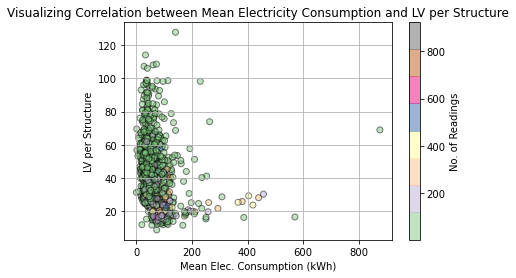

<Figure size 1440x720 with 0 Axes>

In [38]:
# plotting to see what the relationship looks like:

plt.scatter( "mean_stable_cons(kWh)_after12", "lvperstruc", data = cleaned_data, c= "count",
           cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')
plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("LV per Structure")

plt.title("Visualizing Correlation between Mean Electricity Consumption and LV per Structure")

plt.figure(figsize=(20,10))



<Figure size 1440x720 with 0 Axes>

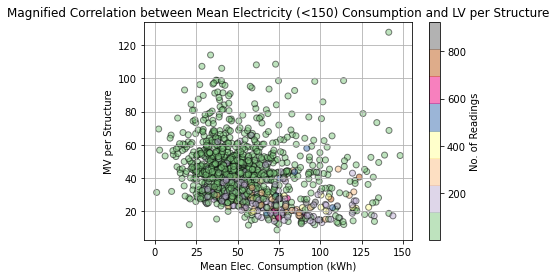

<Figure size 1440x720 with 0 Axes>

In [39]:
# Magnifying the plot from mean of 0-300 

plt.scatter( "mean_stable_cons(kWh)_after12", "lvperstruc",
            data = cleaned_data[cleaned_data["mean_stable_cons(kWh)_after12"] < 150],
            c= "count",cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')
plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("MV per Structure")

plt.title("Magnified Correlation between Mean Electricity (<150) Consumption and LV per Structure")

plt.figure(figsize=(20,10))



In [40]:
data_na_removed = cleaned_data.dropna()

x1b = data_na_removed["mean_stable_cons(kWh)_after12"]
x2b = data_na_removed["lvperstruc"]

# Kendall's tau test


tau, p_value = stats.kendalltau(x1b, x2b)

print(" Kendall's Tau value is", tau)
print("P value is:", p_value)


# Spearman's rho test

coef, p = stats.spearmanr(x1a, x2a)

print("coef value is", coef)
print("P value is:", p)




 Kendall's Tau value is -0.2342097956650484
P value is: 2.6410539855452297e-33
coef value is -0.24876090579261242
P value is: 4.954407766978392e-18


#### Correlation Hypothesis cannot be rejected just by plots in thi case. Might be a weak correlation as suggested by the dense region

In [41]:
# Quantifying the correlations:

Corr_ec_lv = cleaned_data["mean_stable_cons(kWh)_after12"].corr( cleaned_data["lvperstruc"]  )
print("Correlation between Electricity consumption and LV is",Corr_ec_lv )



Correlation between Electricity consumption and LV is -0.1955915695499437


In [42]:
# Performfing tests to see if the relationship is statistically significant:

import scipy.stats as stats


data_na_removed = cleaned_data.dropna()

x1 = data_na_removed["mean_stable_cons(kWh)_after12"]
x2 = data_na_removed["lvperstruc"]

# Kendall's tau test


tau, p_value = stats.kendalltau(x1, x2)

print(" Kendall's Tau value is", tau)
print("P value is:", p_value)


# Spearman's rho test

coef, p = stats.spearmanr(x1, x2)

print("coef value is", coef)
print("P value is:", p)



 Kendall's Tau value is -0.2342097956650484
P value is: 2.6410539855452297e-33
coef value is -0.3408019963265565
P value is: 2.421638907187169e-33


### Some Correlation indeed exists between Electric Consumption and LV per Structure

## Correlations between Electricity consumption and sth per structure:

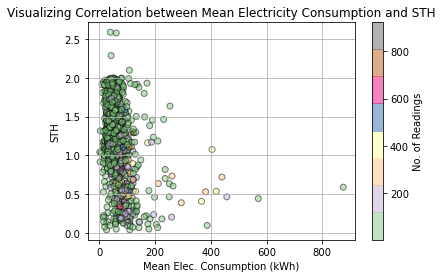

<Figure size 2160x2160 with 0 Axes>

In [43]:
# plotting to see what the relationship looks like:

plt.scatter( "mean_stable_cons(kWh)_after12", "sth", data = cleaned_data, c= "count",
           cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')

plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("STH")
plt.title("Visualizing Correlation between Mean Electricity Consumption and STH")

plt.figure(figsize=(30,30))
plt.show()


<Figure size 1440x720 with 0 Axes>

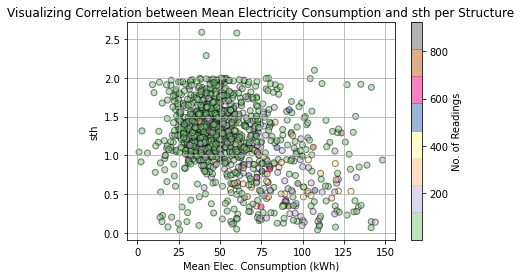

<Figure size 1440x720 with 0 Axes>

In [44]:
# Magnifying the plot from mean of 0-300 

plt.scatter( "mean_stable_cons(kWh)_after12", "sth",
            data = cleaned_data[cleaned_data["mean_stable_cons(kWh)_after12"] < 150],
            c= "count",cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')
plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("sth")

plt.title("Visualizing Correlation between Mean Electricity Consumption and sth per Structure")

plt.figure(figsize=(20,10))



Corr in this case: -0.15637587373390255


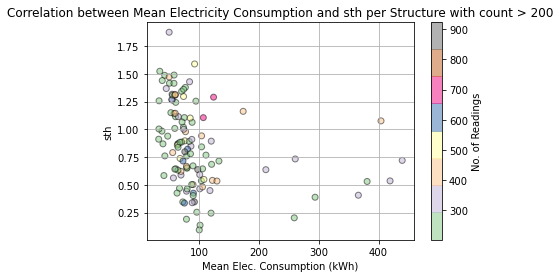

<Figure size 1440x720 with 0 Axes>

In [45]:
#Just Plotting the data with readings > 100:

plt.scatter("mean_stable_cons(kWh)_after12", "sth",
            data = cleaned_data[ cleaned_data["count"] > 200],
            c= "count",cmap = 'Accent' , alpha = 0.5, edgecolors= 'black')
plt.grid()
cbar = plt.colorbar()
cbar.set_label("No. of Readings")
plt.xlabel("Mean Elec. Consumption (kWh)")
plt.ylabel("sth")

plt.title("Correlation between Mean Electricity Consumption and sth per Structure with count > 200")

plt.figure(figsize=(20,10))

# Quantifying this correlation:
HighReadingsData = cleaned_data[cleaned_data["count"] > 200]
print("Corr in this case:", HighReadingsData["mean_stable_cons(kWh)_after12"].corr( HighReadingsData["mvperstruc"]))

In [46]:
data_na_removed = cleaned_data.dropna()

x1c = data_na_removed["mean_stable_cons(kWh)_after12"]
x2c = data_na_removed["sth"]

# Kendall's tau test


tau, p_value = stats.kendalltau(x1c, x2c)

print(" Kendall's Tau value is", tau)
print("P value is:", p_value)


# Spearman's rho test

coef, p = stats.spearmanr(x1, x2)

print("coef value is", coef)
print("P value is:", p)




 Kendall's Tau value is -0.21358750337092333
P value is: 5.584503189719951e-28
coef value is -0.3408019963265565
P value is: 2.421638907187169e-33


In [47]:
# Quantifying the correlations:

Corr_ec_sth = cleaned_data["mean_stable_cons(kWh)_after12"].corr( cleaned_data["sth"]  )
print("Correlation between Electricity consumption and LV is",Corr_ec_sth )



Correlation between Electricity consumption and LV is -0.32278123555269667
